# IMPORTING LIBRARIES#

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
import pickle
import csv
import time
import re



from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import gen_features
warnings.filterwarnings('ignore')
%matplotlib inline

## LOADING DATA##


In [2]:
#read data file
ames_train= pd.read_csv("./datasets/train.csv")
ames_test= pd.read_csv("./datasets/test.csv")

In [3]:
ames_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [4]:
ames_train.shape

(2197, 82)

In [5]:
ames_test.shape

(733, 81)

## DATA PREPROCESSING ##
# Data Preprocessing
**Steps involved in Data Preprocessing**
* Data cleaning
* Dropping irrelevant coulumns
* Removing and imputing null values
* Removing outliers
* Data engineering 
* Log transforming dependent variable (SalePrice)

In [6]:
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   MS Zoning        2197 non-null   object 
 4   Lot Frontage     1835 non-null   float64
 5   Lot Area         2197 non-null   int64  
 6   Street           2197 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2197 non-null   object 
 9   Land Contour     2197 non-null   object 
 10  Utilities        2197 non-null   object 
 11  Lot Config       2197 non-null   object 
 12  Land Slope       2197 non-null   object 
 13  Neighborhood     2197 non-null   object 
 14  Condition 1      2197 non-null   object 
 15  Condition 2      2197 non-null   object 
 16  Bldg Type        2197 non-null   object 
 17  House Style   

In [7]:
ames_train.dtypes
ames_train.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

#### Dealing with null values

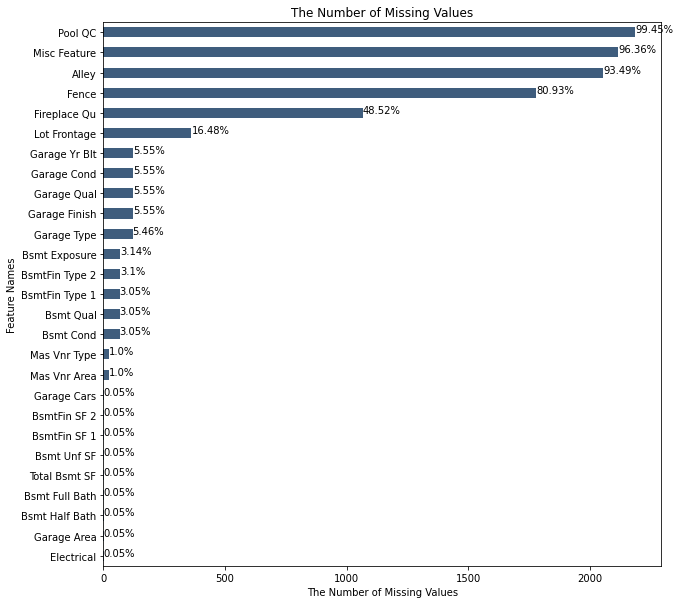

In [8]:
#Checking percentage of null values

Nan = ames_train.isnull().sum()[ames_train.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/ames_train.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names')
plt.title('The Number of Missing Values');

In [9]:
# Drop PID as irrelevant coulums
# Drop  'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu' which have too many null values 
ames_train.drop(['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)

#apply the same method to test data 

ames_test.drop(['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)

ames_train.head().T

,0,1,2,3,4
Order,534,803,956,460,487
MS SubClass,20,20,20,120,80
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,80.0,90.0,NaN,48.0,61.0
Lot Area,9605,14684,14375,6472,9734
...,...,...,...,...,...
Mo Sold,4,6,1,4,5
Yr Sold,2009,2009,2009,2009,2009
Sale Type,WD,WD,COD,WD,WD
Sale Condition,Normal,Normal,Abnorml,Normal,Normal


In [10]:
ames_train['Lot Frontage'].describe()

count    1835.000000
mean       69.549319
std        23.188224
min        21.000000
25%        58.500000
50%        69.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

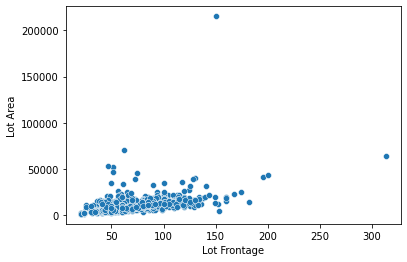

In [11]:
#sns.lmplot(x='Lot Frontage', y='Lot Area', data=ames_train)
sns.scatterplot(x=ames_train['Lot Frontage'], y=ames_train['Lot Area']);


In [12]:
#filtering out outliers
ames_train_impute = ames_train[(ames_train['Lot Frontage'] < 250)].copy()
ames_train_impute = ames_train[(ames_train['Lot Area'] < 100000)].copy()

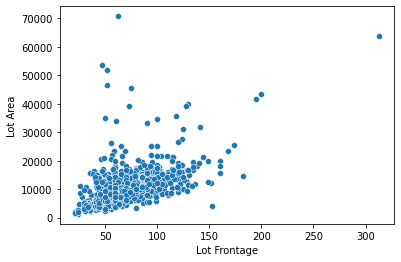

In [13]:
sns.scatterplot(x=ames_train_impute['Lot Frontage'], y=ames_train_impute['Lot Area']);

In [14]:
#there seems to be linear relationship between Lot Frontage and Lot Area
ames_train_impute.dropna(inplace=True)
#calculate OLS to impute missing values 
X = ames_train_impute[['Lot Area']]
y = ames_train_impute['Lot Frontage']
lr = LinearRegression()
lr.fit(X,y)
print(f'Model intercept: {lr.intercept_}')
print(f'Model coefficient: {lr.coef_[0]}')

Model intercept: 44.17950233701229
Model coefficient: 0.0026042282346462314


Lot Frontage = 44.179 + 0.0026*Lot Area

In [15]:
#Imputing missing values of Lot Frontage with linear regression
ames_train['Lot Frontage'] = ames_train.apply(lambda row: round(row['Lot Area']*0.0026 +44.179,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

ames_test['Lot Frontage'] = ames_test.apply(lambda row: round(row['Lot Area']*0.0026 +44.179,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

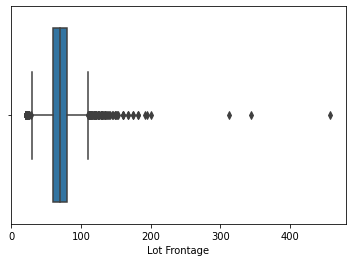

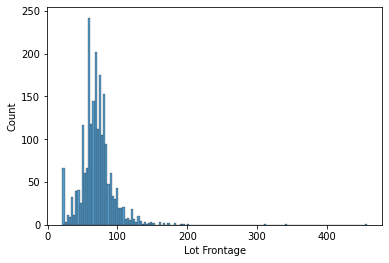

In [16]:
# Box plot
#
sns.boxplot(x = ames_train['Lot Frontage'])
plt.show()
#
# Distribution plot
#
sns.histplot(ames_train['Lot Frontage'])
plt.show()

In [17]:
#Lot Frontage is right skewed with outliers, dropping the outliers 
ames_train = ames_train[(ames_train['Lot Frontage'] < 300)]
ames_train = ames_train[(ames_train['Lot Area'] < 100000)]


In [18]:
ames_train.shape

(2193, 76)

In [19]:
ames_train['Garage Yr Blt'].value_counts()

2005.0    116
2007.0     95
2006.0     88
2004.0     78
2003.0     75
         ... 
2207.0      1
1943.0      1
1906.0      1
1896.0      1
1929.0      1
Name: Garage Yr Blt, Length: 101, dtype: int64

In [20]:
#Year 2207 is incorrect input, drop this row
ames_train= ames_train[ames_train['Garage Yr Blt'] != 2207]

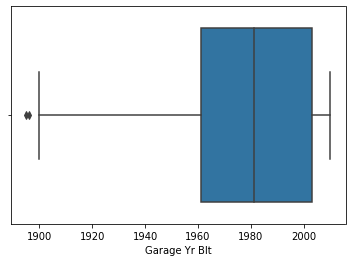

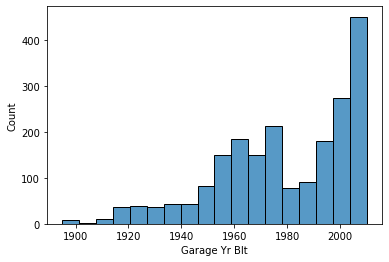

In [21]:
# Box plot
#
sns.boxplot(x = ames_train['Garage Yr Blt'])
plt.show()
#
# Distribution plot
#
sns.histplot(ames_train['Garage Yr Blt'])
plt.show()

In [22]:
ames_train['Garage Yr Blt'].describe()

count    2070.000000
mean     1978.786473
std        25.277499
min      1895.000000
25%      1961.000000
50%      1981.000000
75%      2003.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [23]:
ames_train['Garage Cond'].value_counts()

TA    1988
Fa      55
Po      13
Gd      11
Ex       3
Name: Garage Cond, dtype: int64

In [24]:
ames_train['Garage Qual'].value_counts()

TA    1952
Fa      93
Gd      18
Po       5
Ex       2
Name: Garage Qual, dtype: int64

In [25]:
ames_train['Garage Type'].value_counts()

Attchd     1313
Detchd      568
BuiltIn     137
Basment      28
2Types       17
CarPort       9
Name: Garage Type, dtype: int64

In [26]:
ames_train['Garage Finish'].value_counts()

Unf    901
RFn    627
Fin    542
Name: Garage Finish, dtype: int64

In [27]:
#Impute missing values of Garage Cond, Garage Qual, Garage Type with their modes. 
ames_train['Garage Cond'].fillna(ames_train['Garage Cond'].mode()[0], inplace=True)
ames_train['Garage Qual'].fillna(ames_train['Garage Qual'].mode()[0], inplace=True)
ames_train['Garage Type'].fillna(ames_train['Garage Type'].mode()[0], inplace=True)
ames_train['Garage Finish'].fillna(ames_train['Garage Finish'].mode()[0], inplace=True)


#test data
ames_test['Garage Cond'].fillna(ames_test['Garage Cond'].mode()[0], inplace=True)
ames_test['Garage Qual'].fillna(ames_test['Garage Qual'].mode()[0], inplace=True)
ames_test['Garage Type'].fillna(ames_test['Garage Type'].mode()[0], inplace=True)
ames_test['Garage Finish'].fillna(ames_test['Garage Finish'].mode()[0], inplace=True)


In [28]:
#Assuming garage is bulilt as the same time as house, thus fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house
ames_train['Garage Yr Blt'] = ames_train.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

#test data
ames_test['Garage Yr Blt'] = ames_test.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [29]:
ames_train['Bsmt Exposure'].value_counts()

No    1406
Av     324
Gd     223
Mn     170
Name: Bsmt Exposure, dtype: int64

In [30]:
ames_train['BsmtFin Type 1'].value_counts()

GLQ    661
Unf    644
ALQ    331
Rec    203
BLQ    179
LwQ    107
Name: BsmtFin Type 1, dtype: int64

In [31]:
ames_train['BsmtFin Type 2'].value_counts()

Unf    1867
Rec      75
LwQ      69
BLQ      52
ALQ      38
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [32]:
ames_train['Bsmt Qual'].value_counts()

TA    929
Gd    926
Ex    197
Fa     71
Po      2
Name: Bsmt Qual, dtype: int64

In [33]:
ames_train['Bsmt Cond'].value_counts()

TA    1965
Gd      83
Fa      72
Po       3
Ex       2
Name: Bsmt Cond, dtype: int64

In [34]:
#Impute missing values of 'Bsmt Cond', 'Bsmt Exposure', ''BsmtFin Type 2' with their modes. 

ames_train['Bsmt Cond'].fillna(ames_train['Bsmt Cond'].mode()[0], inplace=True)
ames_train['Bsmt Exposure'].fillna(ames_train['Bsmt Exposure'].mode()[0], inplace=True)
ames_train['BsmtFin Type 2'].fillna(ames_train['BsmtFin Type 2'].mode()[0], inplace=True)
ames_train['BsmtFin Type 1'].fillna(ames_train['BsmtFin Type 1'].mode()[0], inplace=True)
ames_train['Bsmt Qual'].fillna(ames_train['Bsmt Qual'].mode()[0], inplace=True)

#apply the same method to test data
ames_test['Bsmt Cond'].fillna(ames_test['Bsmt Cond'].mode()[0], inplace=True)
ames_test['Bsmt Exposure'].fillna(ames_test['Bsmt Exposure'].mode()[0], inplace=True)
ames_test['BsmtFin Type 2'].fillna(ames_test['BsmtFin Type 2'].mode()[0], inplace=True)
ames_test['BsmtFin Type 1'].fillna(ames_test['BsmtFin Type 1'].mode()[0], inplace=True)
ames_test['Bsmt Qual'].fillna(ames_test['Bsmt Qual'].mode()[0], inplace=True)

In [35]:
ames_train['Mas Vnr Type'].value_counts()

None       1306
BrkFace     658
Stone       188
BrkCmn       18
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [36]:
ames_train['Mas Vnr Area'].value_counts()

0.0       1302
120.0       12
340.0       10
16.0         9
216.0        9
          ... 
564.0        1
382.0        1
436.0        1
255.0        1
1159.0       1
Name: Mas Vnr Area, Length: 390, dtype: int64

In [37]:
#Impute missing values of 'Mas Vnr Type', 'Mas Vnr Area' with their modes. 

ames_train['Mas Vnr Type'].fillna(ames_train['Mas Vnr Type'].mode()[0], inplace=True)
ames_train['Mas Vnr Area'].fillna(ames_train['Mas Vnr Area'].mode()[0], inplace=True)

#apply the same method to test data
ames_test['Mas Vnr Type'].fillna(ames_test['Mas Vnr Type'].mode()[0], inplace=True)
ames_test['Mas Vnr Area'].fillna(ames_test['Mas Vnr Area'].mode()[0], inplace=True)

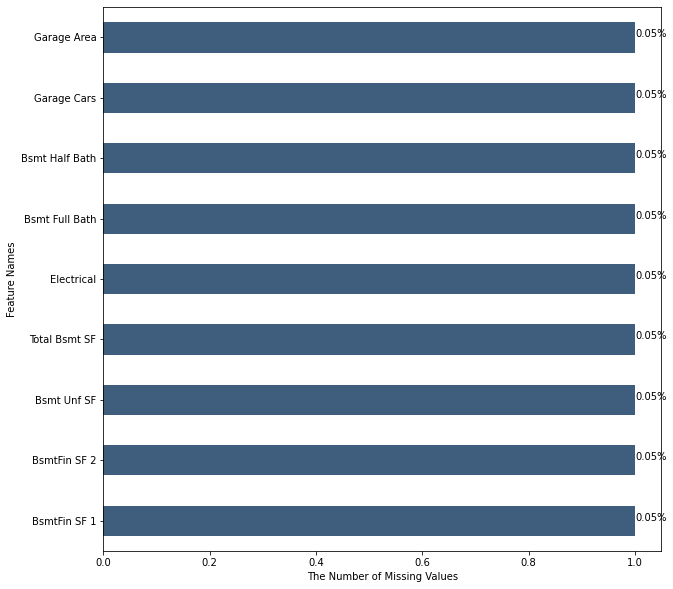

In [38]:
#Rechecking percentage of null values

Nan = ames_train.isnull().sum()[ames_train.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/ames_train.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names')
plt.show()

In [39]:
#Impute all remaining missing values with their modes. 
ames_train['BsmtFin SF 1'].fillna(ames_train['BsmtFin SF 1'].mode()[0], inplace=True)
ames_train['BsmtFin SF 2'].fillna(ames_train['BsmtFin SF 2'].mode()[0], inplace=True)
ames_train['Bsmt Unf SF'].fillna(ames_train['Bsmt Unf SF'].mode()[0], inplace=True)
ames_train['Total Bsmt SF'].fillna(ames_train['Total Bsmt SF'].mode()[0], inplace=True)
ames_train['Electrical'].fillna(ames_train['Electrical'].mode()[0], inplace=True)
ames_train['Bsmt Full Bath'].fillna(ames_train['Bsmt Full Bath'].mode()[0], inplace=True)
ames_train['Bsmt Half Bath'].fillna(ames_train['Bsmt Half Bath'].mode()[0], inplace=True)
ames_train['Garage Cars'].fillna(ames_train['Garage Cars'].mode()[0], inplace=True)
ames_train['Garage Area'].fillna(ames_train['Garage Area'].mode()[0], inplace=True)

#apply the same method to test data
ames_test['BsmtFin SF 1'].fillna(ames_test['BsmtFin SF 1'].mode()[0], inplace=True)
ames_test['BsmtFin SF 2'].fillna(ames_test['BsmtFin SF 2'].mode()[0], inplace=True)
ames_test['Bsmt Unf SF'].fillna(ames_test['Bsmt Unf SF'].mode()[0], inplace=True)
ames_test['Total Bsmt SF'].fillna(ames_test['Total Bsmt SF'].mode()[0], inplace=True)
ames_test['Electrical'].fillna(ames_test['Electrical'].mode()[0], inplace=True)
ames_test['Bsmt Full Bath'].fillna(ames_test['Bsmt Full Bath'].mode()[0], inplace=True)
ames_test['Bsmt Half Bath'].fillna(ames_test['Bsmt Half Bath'].mode()[0], inplace=True)
ames_test['Garage Cars'].fillna(ames_test['Garage Cars'].mode()[0], inplace=True)
ames_test['Garage Area'].fillna(ames_test['Garage Area'].mode()[0], inplace=True)

In [40]:
ames_train.isnull().sum().sum()

0

In [41]:
ames_test.isnull().sum().sum()

0

### Exploring target vaiable (SalePrice)

<Figure size 432x432 with 0 Axes>

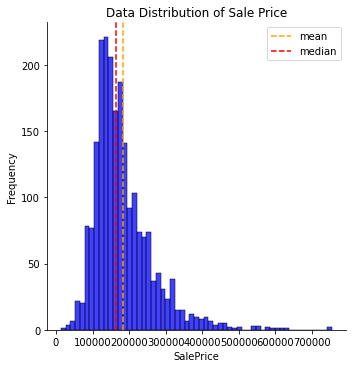

In [42]:
#checking Data Distribution of SalePrice
plt.figure(figsize=(6,6))

sns.displot(ames_train['SalePrice'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of Sale Price')

plt.axvline(ames_train['SalePrice'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(ames_train['SalePrice'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

In [43]:
# Sale price is right skewed with long right tailed
ames_train['SalePrice'].skew().round(2)

1.79

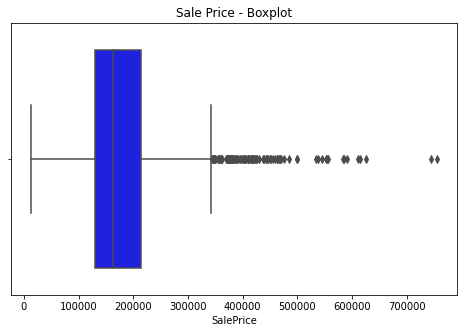

In [44]:
#checking outliers
plt.figure(figsize=(8,5))
plt.title('Sale Price - Boxplot')
sns.boxplot(x=ames_train['SalePrice'], color='b');

In [45]:
# Log transform Sale price to treat outliers and convert right skewed data ton normal distribution form
ames_train['SalePrice_log'] = np.log(ames_train['SalePrice'])

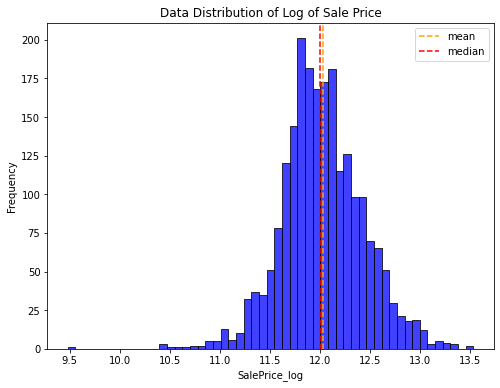

In [46]:
#checking Data Distribution of Log(SalePrice)
plt.figure(figsize=(8,6))

sns.histplot(ames_train['SalePrice_log'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of Log of Sale Price')

plt.axvline(ames_train['SalePrice_log'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(ames_train['SalePrice_log'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

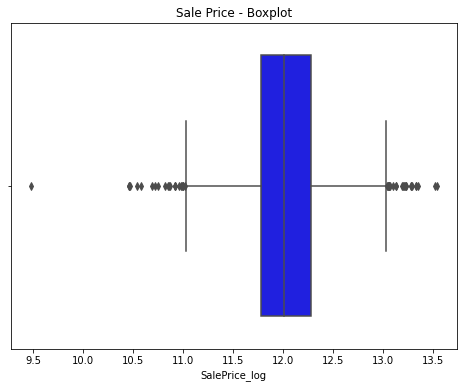

In [47]:
#checking outliers of Log of Sale Price
plt.figure(figsize=(8,6))
plt.title('Sale Price - Boxplot')
sns.boxplot(x=ames_train['SalePrice_log'], color='b');

In [48]:
#Dropping the outliers. 
ames_train = ames_train[(ames_train['SalePrice_log'] > 10)]
ames_train = ames_train[(ames_train['SalePrice_log'] < 13.5)]
ames_train['SalePrice_log'].skew().round(2)

0.07

### Exploring potential independent variables with predictive power of Log SalePrice

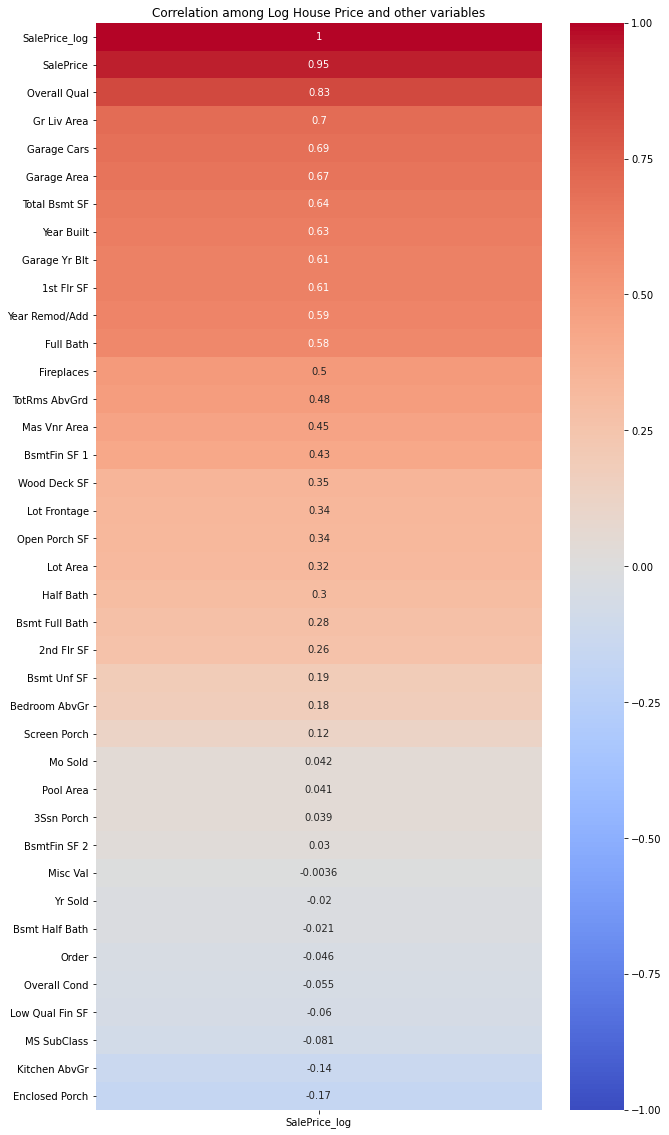

In [49]:
plt.figure(figsize = (10,20))
sns.heatmap(ames_train.corr()[['SalePrice_log']].sort_values(by = 'SalePrice_log', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation among Log House Price and other variables')

plt.yticks(rotation =0)
plt.show()

### Data Engineering

In [50]:
#Changing year to duration of time of train data (age)
ames_train['Age_Year Built'] = 2011 - ames_train['Year Built']
ames_train['Age_Year Remod/Add'] = 2011 - ames_train['Year Remod/Add'] 
ames_train['Age_Year Sold'] = 2011 - ames_train['Yr Sold'] 
ames_train['Age_Garage Yr Blt'] = 2011 - ames_train['Garage Yr Blt']

#Drop original columns
ames_train.drop(['Year Built', 'Year Remod/Add', 'Yr Sold', 'Garage Yr Blt'], axis=1, inplace=True)
ames_train.head(2)


,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Misc Val,Mo Sold,Sale Type,Sale Condition,SalePrice,SalePrice_log,Age_Year Built,Age_Year Remod/Add,Age_Year Sold,Age_Garage Yr Blt
0,534,20,RL,80.0,9605,Pave,Reg,Lvl,AllPub,Corner,...,0,4,WD,Normal,159000,11.976659,4,4,2,4.0
1,803,20,RL,90.0,14684,Pave,IR1,Lvl,AllPub,CulDSac,...,0,6,WD,Normal,271900,12.513190,21,20,2,21.0


In [51]:
#Changing year to duration of time of test data (age)
ames_test['Age_Year Built'] = 2011 - ames_test['Year Built'] 
ames_test['Age_Year Remod/Add'] = 2011 - ames_test['Year Remod/Add']
ames_test['Age_Year Sold'] = 2011 - ames_test['Yr Sold']
ames_test['Age_Garage Yr Blt'] = 2011 - ames_test['Garage Yr Blt']

#Drop original columns
ames_test.drop(['Year Built', 'Year Remod/Add', 'Yr Sold', 'Garage Yr Blt'], axis=1, inplace=True)
ames_test.head(2)

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Sale Type,Sale Condition,Age_Year Built,Age_Year Remod/Add,Age_Year Sold,Age_Garage Yr Blt
0,2127,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,WD,Normal,17,16,4,17.0
1,193,75,RL,64.4,7793,Pave,IR1,Bnk,AllPub,Corner,...,0,0,0,5,WD,Normal,89,6,1,83.0


In [52]:
# Calculating  total house area including basement
ames_train['total_sqrft'] = ames_train['Total Bsmt SF'] + ames_train['1st Flr SF'] +ames_train['2nd Flr SF']  

# Calculating  total house area  excluding basement
ames_train['total_sqrft_abgr'] = ames_train['1st Flr SF'] +ames_train['2nd Flr SF']

# Calculating area per room
ames_train['area_per_room'] = ames_train['total_sqrft_abgr']/ ames_train['TotRms AbvGrd']

# Calculate total bathroom 

ames_train['total_bathroom'] = ames_train['Full Bath']+ ames_train['Half Bath'] + ames_train['Bsmt Full Bath']

#Calculating overall impact using interaction between Overall Qual' and  'Gr Liv Area'
ames_train['overall_impact'] = ames_train['Overall Qual']*ames_train['Gr Liv Area']

#Calculating overall impact of garage using interaction between 'Garage Cars and  'Garage Area'
ames_train['overall_garage'] = ames_train['Garage Cars']*ames_train['Garage Area']



#create the same features in test data
ames_test['total_sqrft'] = ames_test['Total Bsmt SF'] + ames_test['1st Flr SF'] +ames_test['2nd Flr SF']
ames_test['total_sqrft_abgr'] = ames_test['1st Flr SF'] +ames_test['2nd Flr SF']
ames_test['area_per_room'] = ames_test['total_sqrft_abgr']/ ames_test['TotRms AbvGrd']
ames_test['total_bathroom'] = ames_test['Full Bath']+ ames_test['Half Bath'] + ames_test['Bsmt Full Bath']
ames_test['overall_impact'] = ames_test['Overall Qual']*ames_test['Gr Liv Area']
ames_test['overall_garage'] = ames_test['Garage Cars']*ames_test['Garage Area']


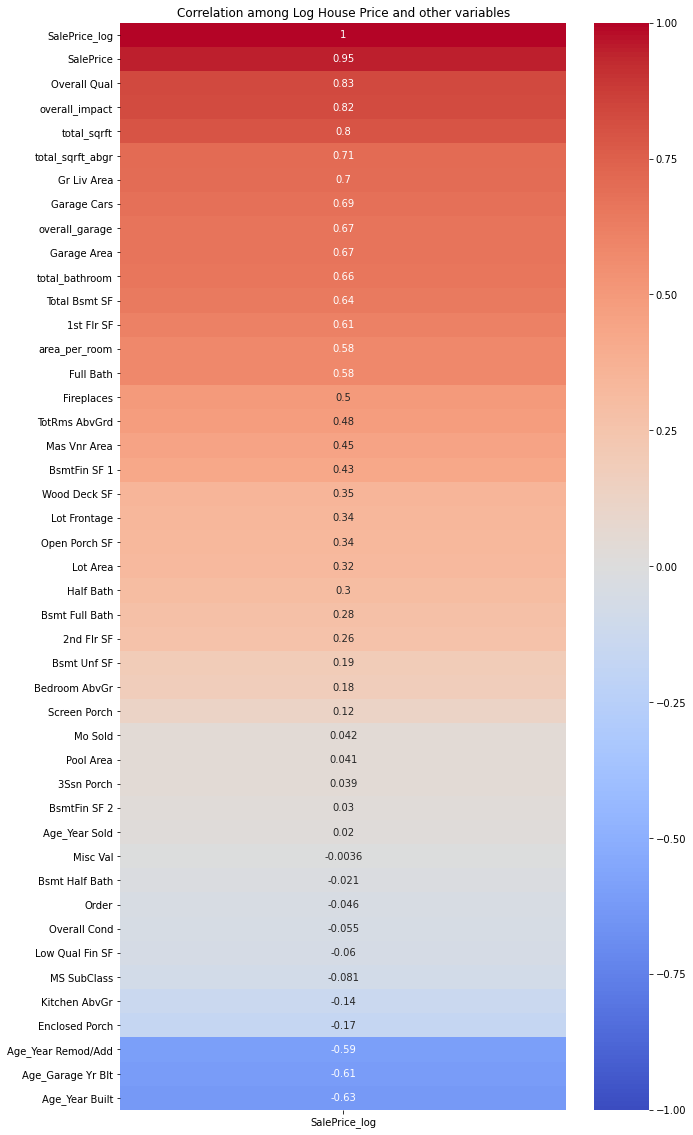

In [53]:
#revisit 

plt.figure(figsize = (10,20))
sns.heatmap(ames_train.corr()[['SalePrice_log']].sort_values(by = 'SalePrice_log', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation among Log House Price and other variables')

plt.yticks(rotation =0)
plt.show()

In [54]:
#26 variables which have correlation coefficient below 0.4 are dropped, other variables will be explore collinearity next
ames_train.drop( ['MS SubClass', 'Lot Frontage', 'Lot Area', 
             'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
             'Bsmt Unf SF', '2nd Flr SF', 'Low Qual Fin SF', 
             'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 
             'Bedroom AbvGr', 'Kitchen AbvGr',
             'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
             'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 
             'Age_Year Sold'], axis=1, inplace=True)
#Fireplaces''TotRms AbvGrd'
ames_test.drop( ['MS SubClass', 'Lot Frontage', 'Lot Area', 
             'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
             'Bsmt Unf SF', '2nd Flr SF', 'Low Qual Fin SF', 
             'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 
             'Bedroom AbvGr', 'Kitchen AbvGr',
             'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
             'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 
             'Age_Year Sold'], axis=1, inplace=True)

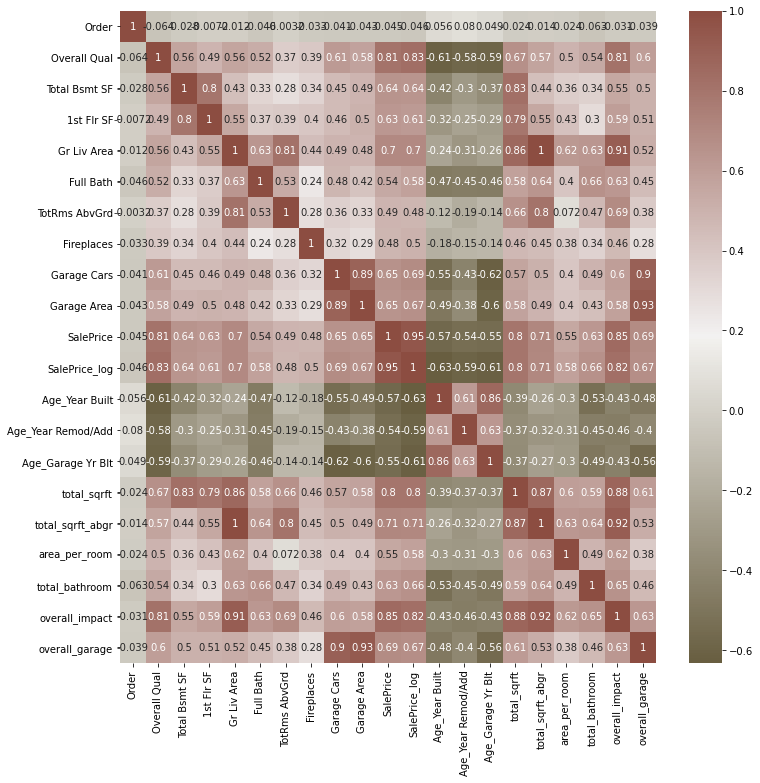

In [55]:
#Checking collinearity using correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= ames_train.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, );

Variables which have correlation above 0.8 could potetially cause colinearity issues leading overfitting model as following
* Overall Qual : overall_impact ==> dropping overall_impact
* Total Bsmt SF : 1st Flr SF : total_sqrft ==> dropping Total Bsmt SF and 1st Flr SF 
* 'Gr Liv Area' : total_sqrft : overall_impact ==>  dropping 'Gr Liv Area'
* 'Garage Cars' : 'Garage Area' : overall_garage ==> dropping 'Garage Area' and overall_garage
* 'Age_Year Built' : 'Age_Garage Yr Blt' ==> dropping 'Age_Garage Yr Blt'
* total_sqrft : total_sqrft_abgr: overall impact ==> dropping  total_sqrft_abgr and overall impact
* total_bathroom: Full Bath ==> dropping Full Bath


In [56]:
# Drop variables which could potetially cause collinearity issues leading overfitting model 
ames_train.drop( ['overall_impact','Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'overall_garage', 'Garage Area',
                'Age_Garage Yr Blt', 'total_sqrft_abgr','Full Bath' ], axis=1, inplace=True)

ames_test.drop( ['overall_impact','Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'overall_garage', 'Garage Area',
                'Age_Garage Yr Blt', 'total_sqrft_abgr','Full Bath' ], axis=1, inplace=True)

In [57]:
# At this stage there 7 numerical variable that need to explore futhter 
#Get list of float and integer variables
nvar = (ames_train.dtypes !="object")
numer_cols = list(nvar[nvar].index)
print("numerical variables:")
print(numer_cols)

numerical variables:
['Order', 'Overall Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'SalePrice', 'SalePrice_log', 'Age_Year Built', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom']


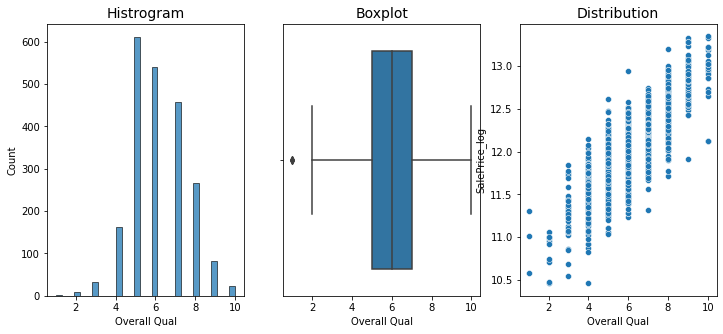

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['Overall Qual'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['Overall Qual'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['Overall Qual'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

In [59]:
#dropping outliers
ames_train = ames_train[(ames_train['Overall Qual'] > 1 )]

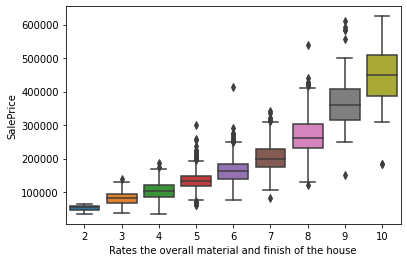

In [60]:
sns.boxplot(data=ames_train, x='Overall Qual', y='SalePrice');
plt.xlabel('Rates the overall material and finish of the house');

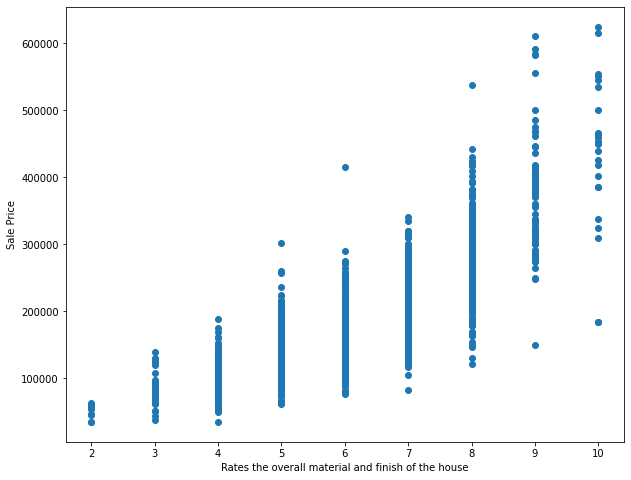

In [61]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Overall Qual'], y = ames_train['SalePrice'])

plt.xlabel('Rates the overall material and finish of the house')

plt.ylabel('Sale Price')

plt.show();

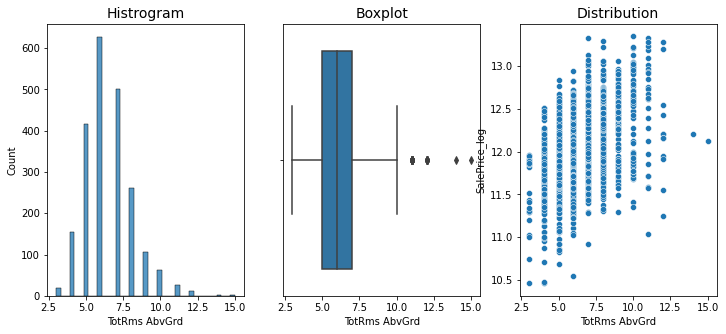

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['TotRms AbvGrd'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['TotRms AbvGrd'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['TotRms AbvGrd'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

In [64]:
#dropping outliers
ames_train = ames_train[(ames_train['TotRms AbvGrd'] <= 12 )]

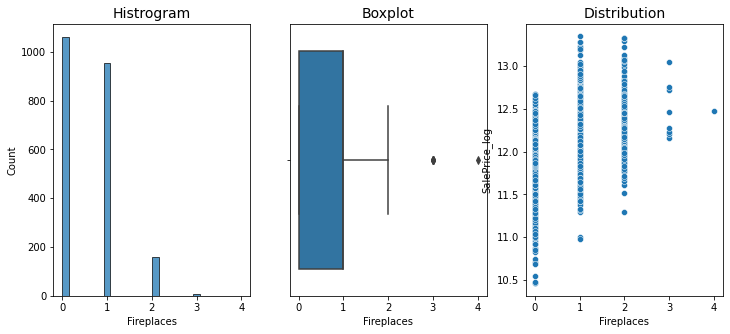

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['Fireplaces'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['Fireplaces'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['Fireplaces'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

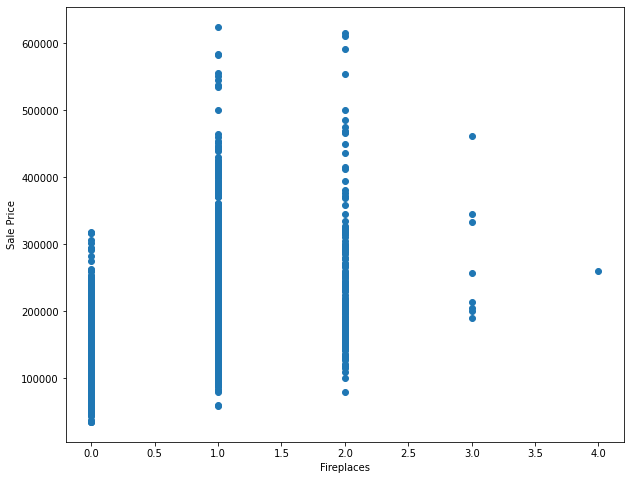

In [66]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Fireplaces'] , y = ames_train['SalePrice'])

plt.xlabel('Fireplaces')

plt.ylabel('Sale Price')

plt.show();

In [67]:
#dropping outliers
ames_train = ames_train[(ames_train['Fireplaces'] <= 3 )]

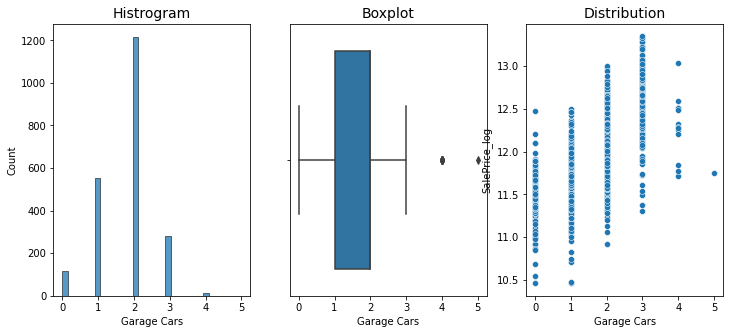

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['Garage Cars'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['Garage Cars'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['Garage Cars'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

In [69]:
#Dropping outliers
ames_train = ames_train[(ames_train['Garage Cars'] <= 3)]

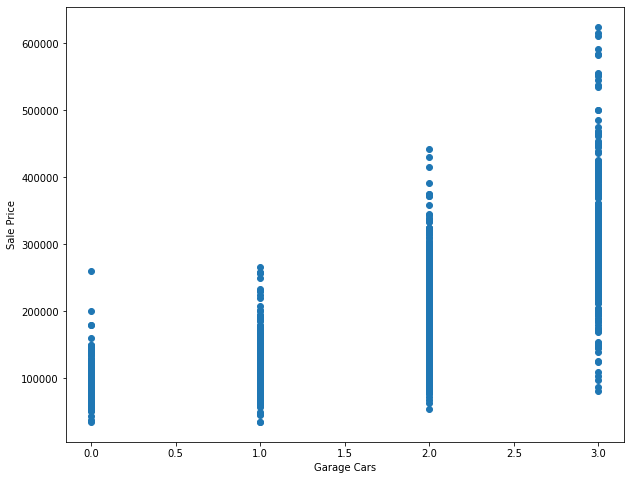

In [70]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Garage Cars'] , y = ames_train['SalePrice'])

plt.xlabel('Garage Cars')

plt.ylabel('Sale Price')

plt.show();

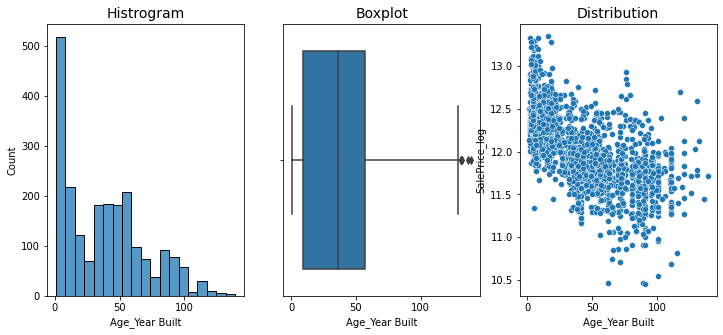

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['Age_Year Built'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['Age_Year Built'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['Age_Year Built'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

In [72]:
# Log transform Age_Year Built to treat outliers and convert right skewed data ton normal distribution form
ames_train['log Age_Year Built'] = np.log(ames_train['Age_Year Built'])
ames_test['log Age_Year Built'] = np.log(ames_test['Age_Year Built'])

# Drop original column 
ames_train.drop(['Age_Year Built'], axis=1, inplace=True)
ames_test.drop(['Age_Year Built'], axis=1, inplace=True)

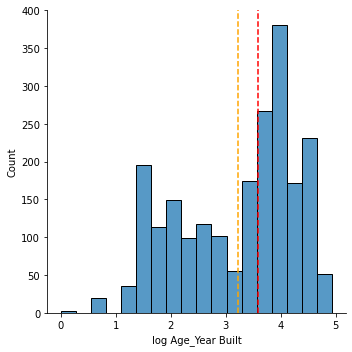

In [73]:
sns.displot(ames_train['log Age_Year Built'])
plt.axvline(ames_train['log Age_Year Built'].mean(), linestyle = '--', color = 'orange', label ='mean')
plt.axvline(ames_train['log Age_Year Built'].median(), linestyle = '--', color = 'r', label ='median');

plt.show()

In [74]:
#dropping outlier
ames_train = ames_train[(ames_train['log Age_Year Built'] > 1)]

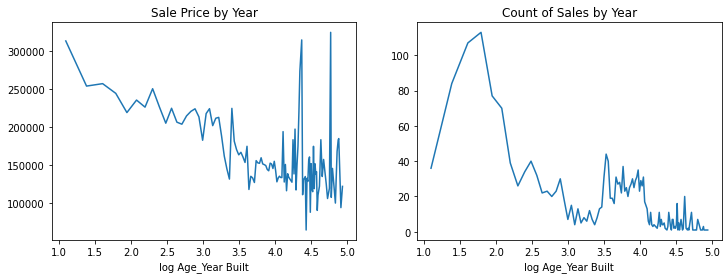

In [205]:
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ames_train.groupby(['log Age_Year Built'])['SalePrice'].mean()\
.plot.line(ax=axes[0], subplots=True)
axes[0].set_title('Sale Price by Year');

ames_train.groupby(['log Age_Year Built'])['SalePrice'].count()\
.plot.line(ax=axes[1],subplots=True)
axes[1].set_title('Count of Sales by Year');

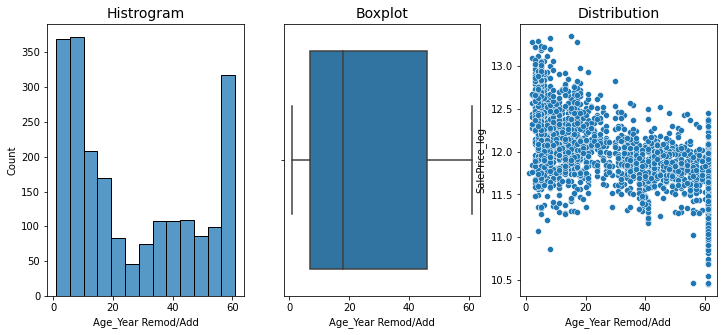

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['Age_Year Remod/Add'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['Age_Year Remod/Add'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['Age_Year Remod/Add'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

In [76]:
ames_train['Age_Year Remod/Add'].head()

0     4
1    20
2    53
3     3
4     7
Name: Age_Year Remod/Add, dtype: int64

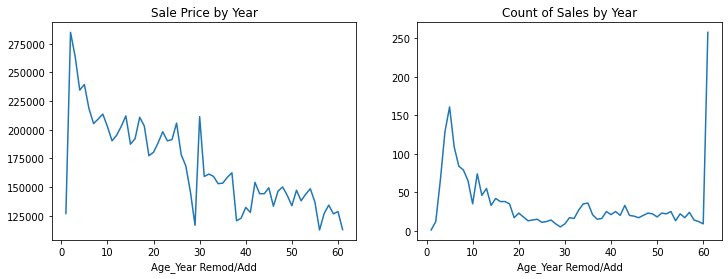

In [77]:
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

ames_train.groupby(['Age_Year Remod/Add'])['SalePrice'].mean()\
.plot.line(ax=axes[0], subplots=True)
axes[0].set_title('Sale Price by Year');

ames_train.groupby(['Age_Year Remod/Add'])['SalePrice'].count()\
.plot.line(ax=axes[1],subplots=True)
axes[1].set_title('Count of Sales by Year');

In [78]:
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# ames_train.groupby(['YearBuilt'])['SalePrice'].mean()\
# .plot.line(ax=axes[0], subplots=True)
# axes[0].set_title('Mean Sale Price by Year')

# ames_train.groupby(['YearBuilt'])['SalePrice'].count()\
# .plot.line(ax=axes[1],subplots=True)
# axes[1].set_title('Count of Sales by Year');

In [79]:
#Dropping outliers
ames_train = ames_train[(ames_train['Age_Year Remod/Add'] <= 60)]

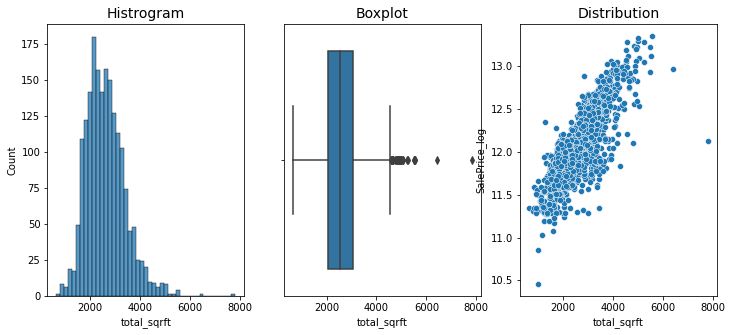

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['total_sqrft'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['total_sqrft'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['total_sqrft'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

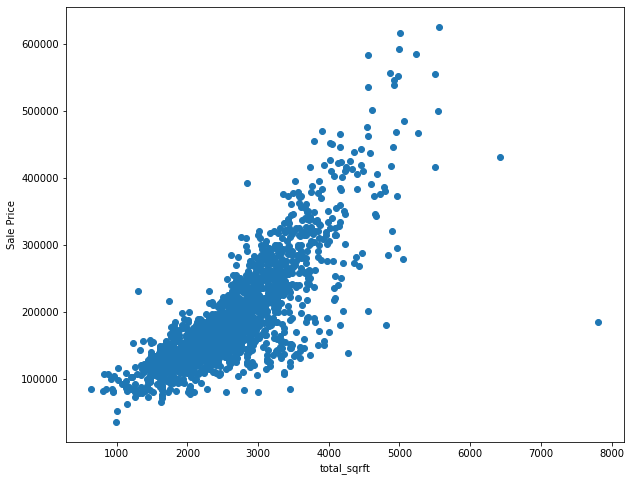

In [81]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['total_sqrft'], y = ames_train['SalePrice'])

plt.xlabel('total_sqrft')

plt.ylabel('Sale Price')

plt.show();

In [82]:
#Dropping outliers
ames_train = ames_train[(ames_train['total_sqrft'] < 6000 )]

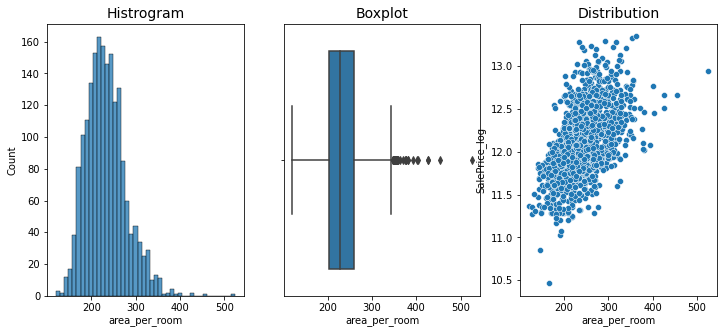

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['area_per_room'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['area_per_room'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['area_per_room'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

In [84]:
#Dropping outliers
ames_train = ames_train[(ames_train['area_per_room'] < 400 )]

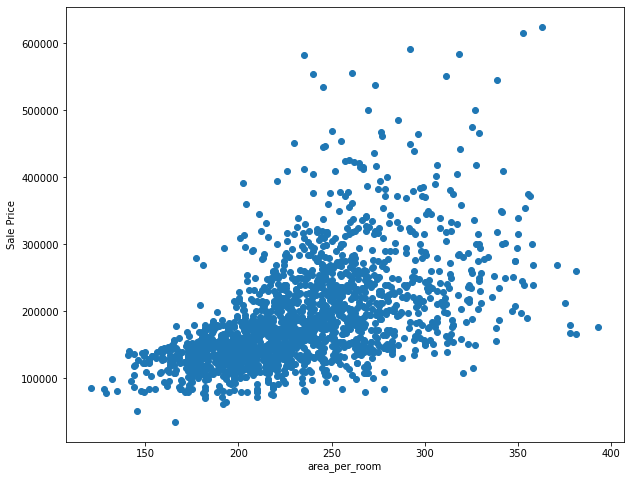

In [85]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['area_per_room'], y = ames_train['SalePrice'])

plt.xlabel('area_per_room')

plt.ylabel('Sale Price')

plt.show();

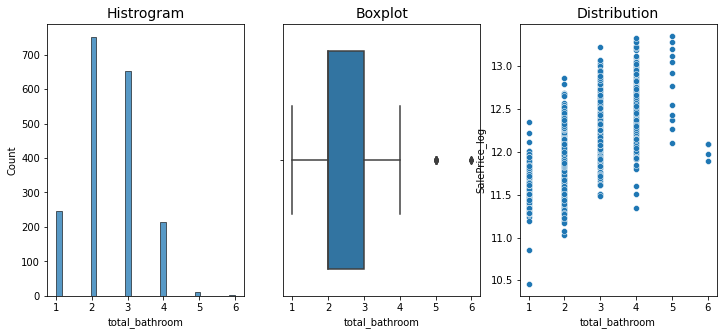

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
ax = ax.ravel() 
ax[0].set_title(f'Histrogram', fontsize =14)
sns.histplot(ames_train['total_bathroom'], ax=ax[0])
ax[1].set_title(f'Boxplot', fontsize =14)
sns.boxplot(x=ames_train['total_bathroom'], ax=ax[1])
ax[2].set_title(f'Distribution', fontsize =14)
sns.scatterplot(x = ames_train['total_bathroom'], y= ames_train['SalePrice_log'],ax=ax[2])
plt.show()

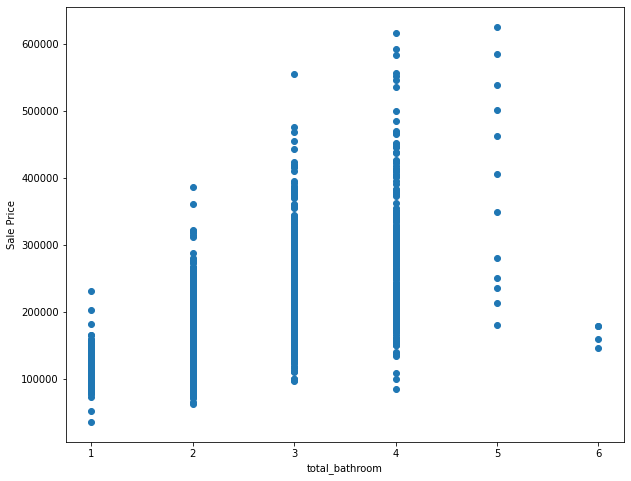

In [87]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['total_bathroom'] , y = ames_train['SalePrice'])

plt.xlabel('total_bathroom')

plt.ylabel('Sale Price')

plt.show();

In [88]:
#Dropping outliers
ames_train = ames_train[(ames_train['total_bathroom'] < 5 )]

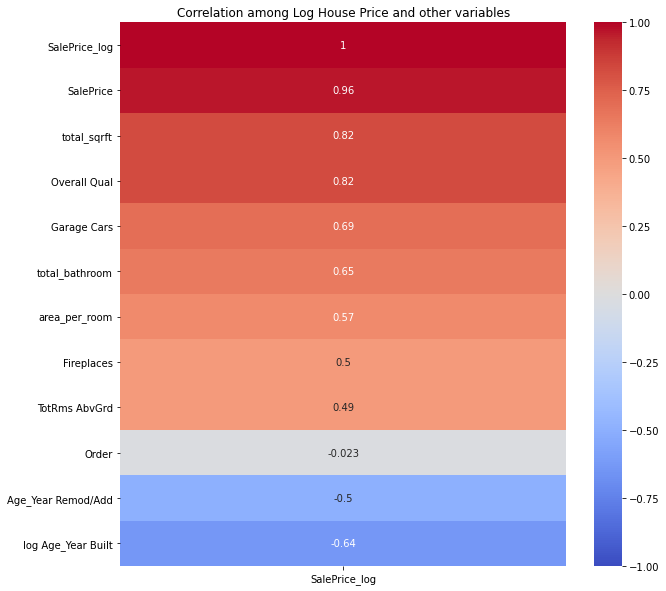

In [89]:
#revisit 

plt.figure(figsize = (10,10))
sns.heatmap(ames_train.corr()[['SalePrice_log']].sort_values(by = 'SalePrice_log', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation among Log House Price and other variables')

plt.yticks(rotation =0)
plt.show()

#ames_train.drop(['Year Built', 'Year Remod/Add', 'Yr Sold', 'Garage Yr Blt'], axis=1, inplace=True)

In [90]:
# Get list of float and integer variables
nvar = (ames_train.dtypes !="object")
numer_cols = list(nvar[nvar].index)
print("numerical variables:")
print(numer_cols)

numerical variables:
['Order', 'Overall Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'SalePrice', 'SalePrice_log', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom', 'log Age_Year Built']


#### Exploring categorical variables

In [91]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = ames_train.groupby(column).mean()['SalePrice_log'].sort_values().index
        
        sns.boxplot(x = dataframe[column],y = dataframe['SalePrice_log'],order = names, ax = ax[i], color="#99d6ff") 
        
        ax[i].set_title(f' " Log SalePrice" vs "{column}"', fontsize =16)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

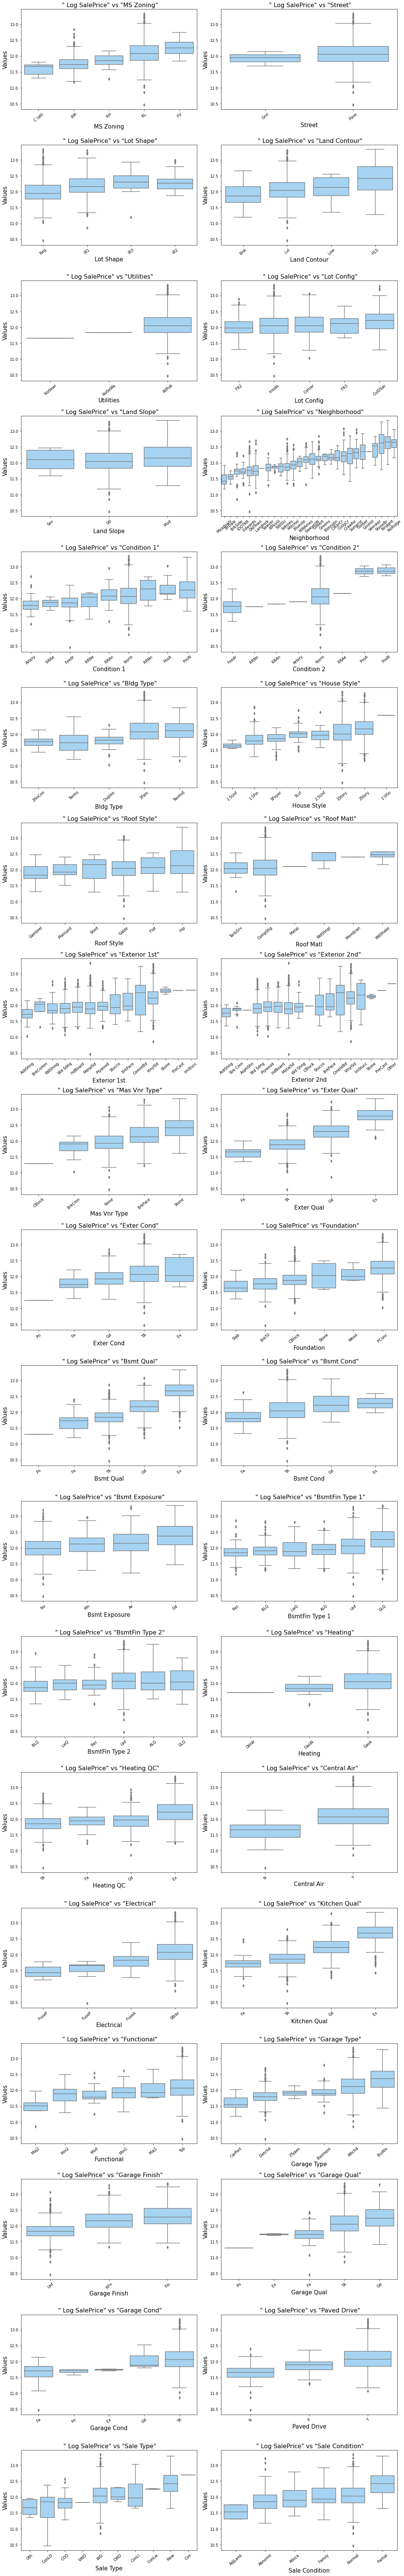

In [92]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
subplot_boxplot(ames_train, Catogories_columns)

Variables which could not be good predictor for Sale Price
* Lot Config
* Land Slope 
* Roof Style  
* BsmtFin Type 1 
* BsmtFin Type 2
* Lot Shape
* Land Contour

Variables which could be good predictor for Sale Price

* MS Zoning
* Street
* Utilities
* Exter Qual
* Neighborhood
* Mas Vnr Type
* Bsmt Cond
* Heating QC
* Central Air
* Kitchen Qual
* Garage Finish
* Paved Drive
* Sale Condition


In [93]:
ames_train.groupby(['MS Zoning'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
MS Zoning,,,
C (all),6,11.59,11.67
FV,102,12.26,12.26
RH,8,11.82,11.85
RL,1531,12.11,12.07
RM,218,11.76,11.74


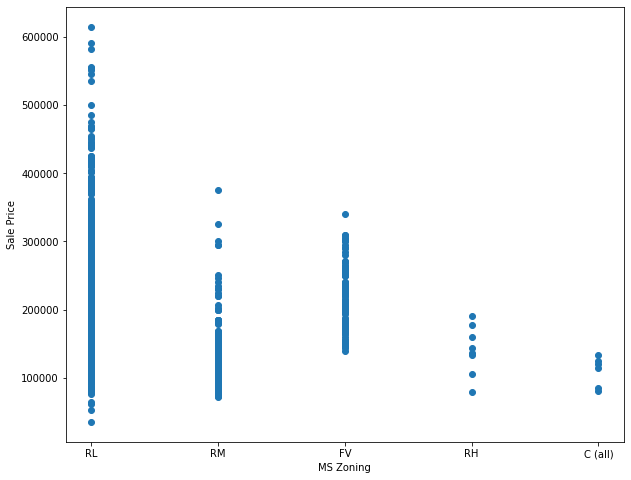

In [206]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['MS Zoning'] , y = ames_train['SalePrice'])

plt.xlabel('MS Zoning')

plt.ylabel('Sale Price')

plt.show();

In [94]:
#Dropping minority category 
ames_train = ames_train[(ames_train['MS Zoning'] != 'I (all)' )]

In [95]:
ames_train.groupby(['Street'])['SalePrice_log'].agg(['count','mean','median']).round(2)
#the majority of data fall in Pave, drop this column

,count,mean,median
Street,,,
Grvl,3,11.92,11.95
Pave,1862,12.08,12.05


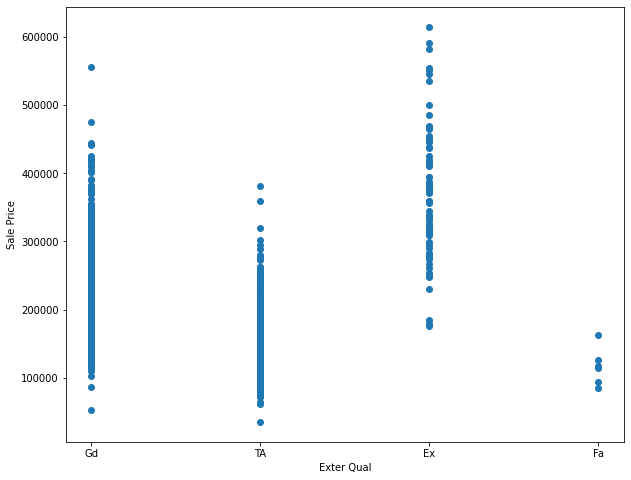

In [221]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Exter Qual'] , y = ames_train['SalePrice'])

plt.xlabel('Exter Qual')
plt.ylabel('Sale Price')

plt.show();

In [96]:
ames_train.groupby(['Exter Qual'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Exter Qual,,,
Ex,77,12.78,12.78
Fa,6,11.64,11.66
Gd,719,12.30,12.30
TA,1063,11.88,11.87


In [97]:
ames_train.groupby(['Utilities'])['SalePrice_log'].agg(['count','mean','median']).round(2)
#the majority of data fall in AllPub, drop this column

,count,mean,median
Utilities,,,
AllPub,1863,12.08,12.05
NoSeWa,1,11.83,11.83
NoSewr,1,11.65,11.65


In [254]:

ms_zoning = ames_train.groupby('MS Zoning').mean()['SalePrice'].sort_values(ascending=False)
ms_zoning

MS Zoning
FV         216096.500000
RL         194635.745752
RH         140625.000000
RM         133796.178899
C (all)    109883.333333
Name: SalePrice, dtype: float64

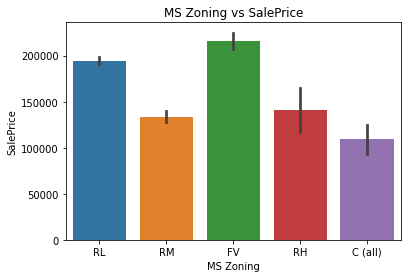

In [281]:
# plt.figure(figsize=(10,8))



# sns.barplot(y= ms_zoning.index, x=ms_zoning)

# plt.ylabel('MS Zoning')

# plt.xlabel('Sale Price')

# plt.show();

# plt.figure(figsize=(10,8));

##

sns.barplot(data=ames_train, y="SalePrice", x="MS Zoning")
plt.title("MS Zoning vs SalePrice");

In [272]:
neighbor = ames_train.groupby('Neighborhood').mean()['SalePrice'].sort_values(ascending=False).to_frame()
neighbor

,SalePrice
Neighborhood,
StoneBr,325032.529412
NridgHt,315771.528000
NoRidge,307970.177778
Veenker,255075.000000
Timber,236497.978723
GrnHill,230000.000000
Somerst,228201.496350
Crawfor,220028.615385
CollgCr,204216.334928


In [280]:
plt.figure(figsize=(12,10))
sns.barplot(data=neighbor, x="SalePrice", y="Neighborhood")
plt.title("Neighborhood vs SalePrice");

ValueError: Could not interpret input 'Neighborhood'

<Figure size 864x720 with 0 Axes>

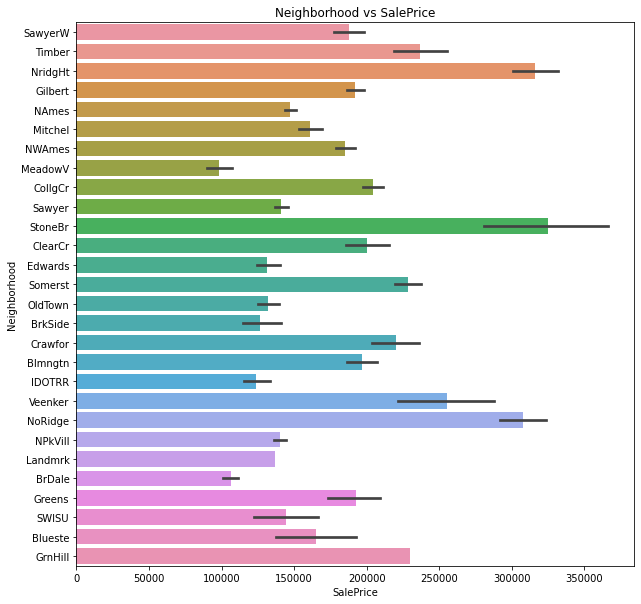

In [279]:
plt.figure(figsize=(10,10))
sns.barplot(data=ames_train, x="SalePrice", y="Neighborhood")
plt.title("Neighborhood vs SalePrice");

Neighborhood
StoneBr    325032.529412
NridgHt    315771.528000
NoRidge    307970.177778
Veenker    255075.000000
Timber     236497.978723
GrnHill    230000.000000
Somerst    228201.496350
Crawfor    220028.615385
CollgCr    204216.334928
ClearCr    200151.230769
Blmngtn    196680.208333
Greens     192375.000000
Gilbert    192307.848000
SawyerW    187610.463415
NWAmes     185308.786408
Blueste    165000.000000
Mitchel    160920.915663
NAmes      147330.840532
SWISU      144400.000000
Sawyer     141019.270833
NPkVill    140492.105263
Landmrk    137000.000000
OldTown    132247.113208
Edwards    131591.026549
BrkSide    126510.833333
IDOTRR     124007.464286
BrDale     106176.190476
MeadowV     98298.076923
Name: SalePrice, dtype: float64

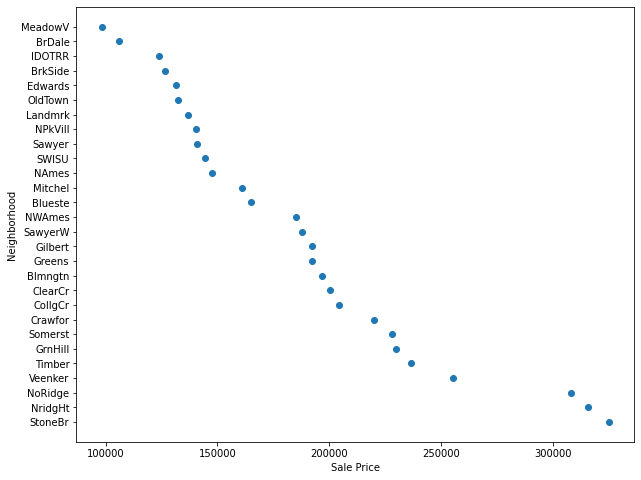

In [256]:
plt.figure(figsize=(10,8))



plt.scatter(y= neighbor.index, x=neighbor)

plt.ylabel('Neighborhood')

plt.xlabel('Sale Price')

plt.show();

In [240]:
install.packages("tidyverse")

NameError: name 'install' is not defined

In [237]:
# tapply(ames_train['SalePrice'], ames_train['Neighborhood'], FUN = NULL)
# load library tidyverse
library(tidyverse)

neighbourhoods = tapply(ames_train['SalePrice'], ames_train['Neighborhood'], median)
neighbourhoods = sort(neighbourhoods, decreasing = TRUE)

dotchart(neighbourhoods, pch = 21, bg = "purple1",
         cex = 0.85,
         xlab="Average price of a house",
         main = "Which neighborhood is the most expensive to buy a house in?")

NameError: name 'library' is not defined

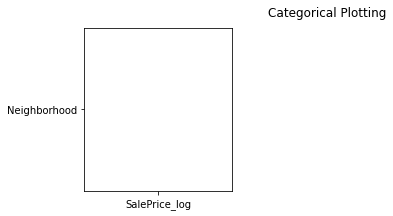

In [229]:
names =['SalePrice_log']
values =['Neighborhood']

plt.figure(figsize=(9, 3))

sns.(131)
plt.bar('SalePrice_log','Neighborhood')
# plt.subplot(132)
# plt.scatter('Neighborhood', 'SalePrice_log')
# plt.subplot(133)
# plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show();

In [210]:
ames_train.groupby(['Neighborhood'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Neighborhood,,,
Blmngtn,24,12.18,12.16
Blueste,4,12.00,12.03
BrDale,21,11.57,11.57
BrkSide,30,11.71,11.74
ClearCr,26,12.19,12.15
CollgCr,209,12.20,12.22
Crawfor,52,12.26,12.29
Edwards,113,11.74,11.76
Gilbert,125,12.15,12.12


In [102]:
ames_train.groupby(['Mas Vnr Type'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Mas Vnr Type,,,
BrkCmn,17,11.81,11.90
BrkFace,629,12.19,12.13
CBlock,1,11.29,11.29
None,1051,11.96,11.93
Stone,167,12.41,12.41


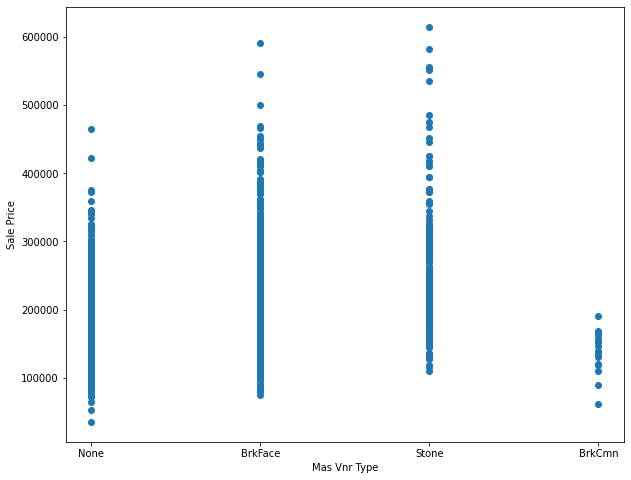

In [211]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Mas Vnr Type'] , y = ames_train['SalePrice'])

plt.xlabel('Mas Vnr Type')

plt.ylabel('Sale Price')

plt.show();

In [103]:
#Dropping minority category 
ames_train = ames_train[(ames_train['Mas Vnr Type'] != 'CBlock' )]

In [104]:
ames_train.groupby(['Bsmt Cond'])['SalePrice_log'].agg(['count','mean','median']).round(2)
#the majority of data fall in TA, drop this column

,count,mean,median
Bsmt Cond,,,
Ex,2,12.28,12.28
Fa,35,11.83,11.80
Gd,76,12.26,12.21
TA,1751,12.07,12.04


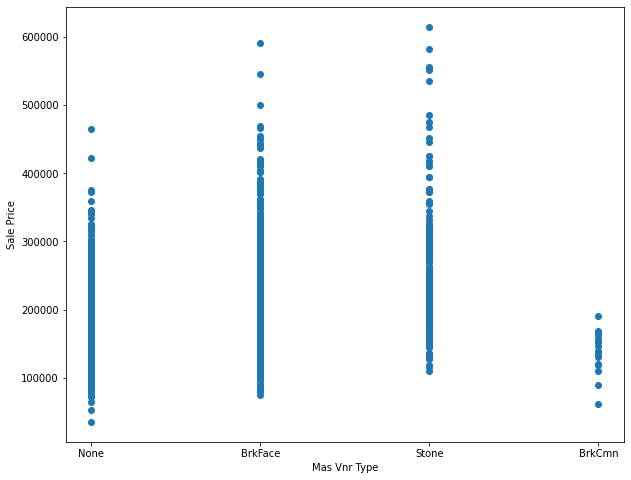

In [219]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Mas Vnr Type'] , y = ames_train['SalePrice'])

plt.xlabel('Mas Vnr Type')
plt.ylabel('Sale Price')

plt.show();

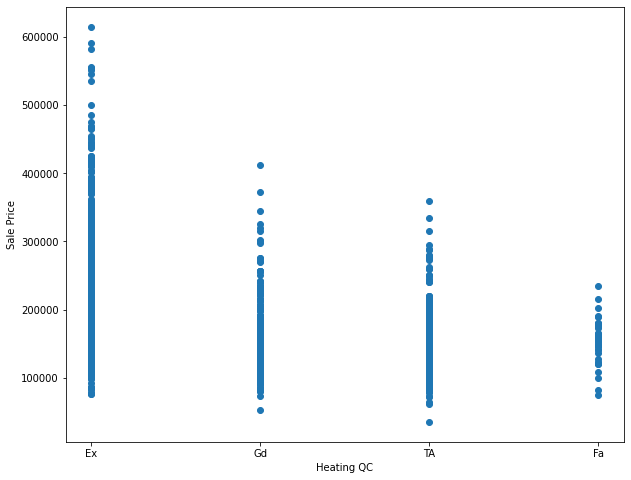

In [213]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Heating QC'] , y = ames_train['SalePrice'])

plt.xlabel('Heating QC')

plt.ylabel('Sale Price')

plt.show();

In [105]:
ames_train.groupby(['Heating QC'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Heating QC,,,
Ex,1019,12.23,12.22
Fa,36,11.91,11.95
Gd,305,11.95,11.96
TA,504,11.85,11.84


In [106]:
#Dropping minority category 
ames_train = ames_train[(ames_train['Heating QC'] != 'Po' )]

In [107]:
ames_train.groupby(['Central Air'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Central Air,,,
N,54,11.63,11.65
Y,1810,12.09,12.06


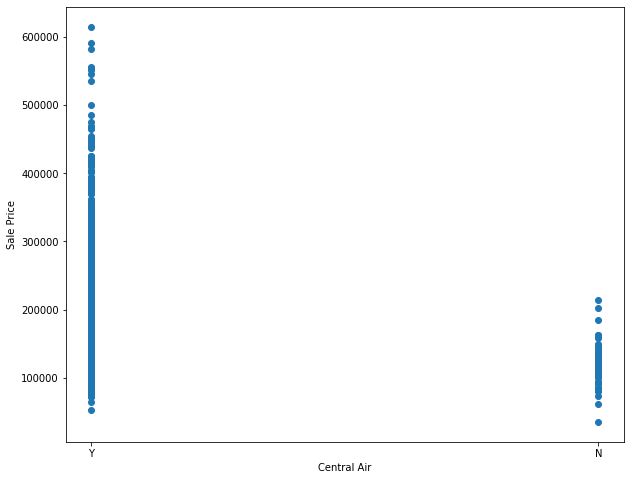

In [214]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Central Air'] , y = ames_train['SalePrice'])

plt.xlabel('Central Air')

plt.ylabel('Sale Price')

plt.show();

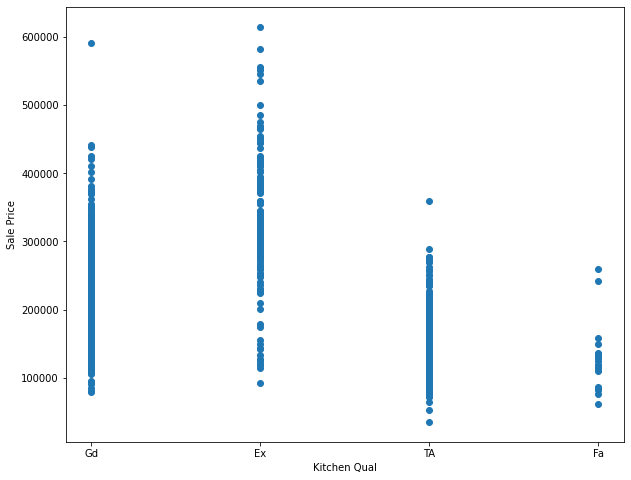

In [222]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Kitchen Qual'] , y = ames_train['SalePrice'])

plt.xlabel('Kitchen Qual')
plt.ylabel('Sale Price')

plt.show();

In [108]:
ames_train.groupby(['Kitchen Qual'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Kitchen Qual,,,
Ex,143,12.65,12.68
Fa,21,11.71,11.73
Gd,819,12.22,12.22
TA,881,11.86,11.86


In [109]:
#Dropping minority category 
ames_train = ames_train[(ames_train['Kitchen Qual'] != 'Po' )]

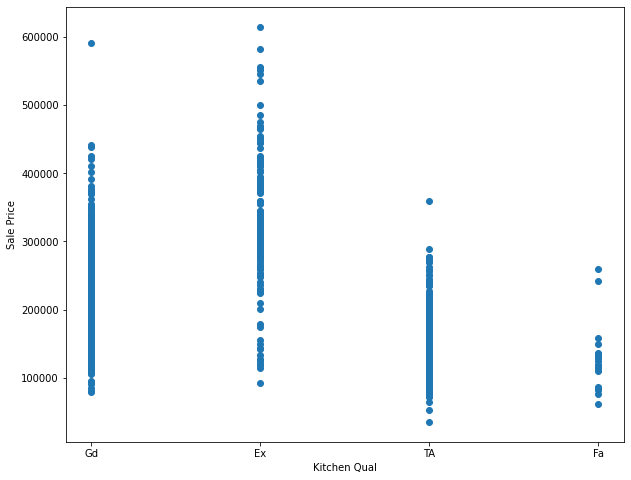

In [217]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Kitchen Qual'] , y = ames_train['SalePrice'])

plt.xlabel('Kitchen Qual')

plt.ylabel('Sale Price')

plt.show();

In [110]:
ames_train.groupby(['Garage Finish'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Garage Finish,,,
Fin,509,12.30,12.27
RFn,600,12.18,12.16
Unf,755,11.85,11.83


In [111]:
ames_train.groupby(['Paved Drive'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Paved Drive,,,
N,80,11.64,11.65
P,27,11.84,11.89
Y,1757,12.10,12.07


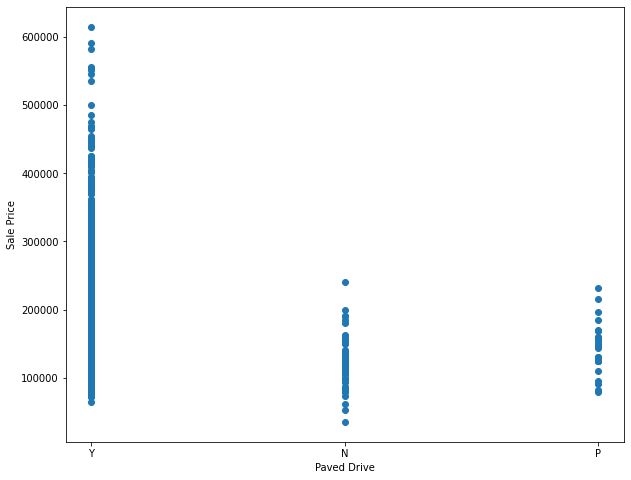

In [215]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Paved Drive'] , y = ames_train['SalePrice'])

plt.xlabel('Paved Drive')

plt.ylabel('Sale Price')

plt.show();

In [112]:
ames_train.groupby(['Sale Condition'])['SalePrice_log'].agg(['count','mean','median']).round(2)

,count,mean,median
Sale Condition,,,
Abnorml,98,11.88,11.86
AdjLand,4,11.53,11.54
Alloca,13,11.96,11.90
Family,29,11.98,11.93
Normal,1556,12.06,12.03
Partial,164,12.44,12.42


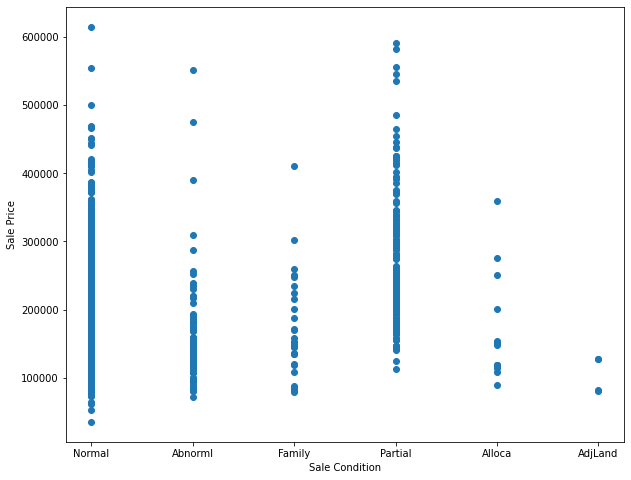

In [216]:
plt.figure(figsize=(10,8))

plt.scatter(x = ames_train['Sale Condition'] , y = ames_train['SalePrice'])

plt.xlabel('Sale Condition')

plt.ylabel('Sale Price')

plt.show();

In [113]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
Catogories_columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [114]:
# Drop variables which could could not be good predictor for Log Sale Price
ames_train.drop( ['Lot Config', 'Land Slope', 'Roof Style', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Street', 'Bsmt Cond', 'Utilities'], axis=1, inplace=True)
ames_test.drop( ['Lot Config', 'Land Slope', 'Roof Style', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Street', 'Bsmt Cond', 'Utilities'], axis=1, inplace=True)

In [115]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
Catogories_columns

Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

Checking collinearity of catergorical variables

In [116]:
ames_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Order,1864.0,1446.54,837.49,1.00,721.50,1446.50,2163.25,2929.00
Overall Qual,1864.0,6.25,1.34,2.00,5.00,6.00,7.00,10.00
TotRms AbvGrd,1864.0,6.47,1.51,3.00,5.00,6.00,7.00,12.00
Fireplaces,1864.0,0.61,0.63,0.00,0.00,1.00,1.00,3.00
Garage Cars,1864.0,1.84,0.70,0.00,1.00,2.00,2.00,3.00
SalePrice,1864.0,188190.13,75067.77,35000.00,136903.75,171000.00,221000.00,615000.00
SalePrice_log,1864.0,12.08,0.36,10.46,11.83,12.05,12.31,13.33
Age_Year Remod/Add,1864.0,21.80,17.61,1.00,6.00,14.00,37.00,60.00
total_sqrft,1864.0,2594.67,735.22,640.00,2064.00,2535.50,3055.00,5542.00
area_per_room,1864.0,232.81,43.40,121.00,201.79,228.50,259.60,393.25


In [117]:
ames_train.isnull().sum().sum(),ames_test.isnull().sum().sum()

(0, 0)

In [118]:
ames_train.shape, ames_test.shape

((1864, 42), (733, 40))

# MODEL BUILDING #

#### Building model with numerical variables 

In [119]:
#Assemble our X and y variables
X=ames_train[['Overall Qual', 'Garage Cars', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom', 'log Age_Year Built']]
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')
print()

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
print(f'Cross Val Score :{cross_val_score(model, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print()

y_preds_original_scale = np.exp(y_preds)
y_train_original_scale = np.exp(y_train)
y_test_original_scale = np.exp(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8590577398398075

Test R-squared Score: 0.8600187145121619
Cross Val Score :[0.83170455 0.86556553 0.85761332 0.83866014 0.88645986]

R^2 is : 0.8590577398398075

MSE is : 727127290.0311399
RMSE is : 26965.29788508074


In [120]:
test_order = ames_test.Order
test=ames_test[['Overall Qual', 'Garage Cars', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom', 'log Age_Year Built']]
#test = pd.get_dummies(columns=['Garage Finish'], drop_first =True, data =test)

## dummied category only in train data
for col in set(X_train.columns) - set(test.columns):
    test[col] = 0
    
## dummied category only in test data
for col in set(test.columns) - set(X_train.columns):
    test.drop(col, axis=1, inplace=True)

In [121]:
test.shape, X.shape

((733, 7), (1864, 7))

In [122]:
preds_test = model.predict(test)
preds_test = np.exp(preds_test)
preds_test[:10]

array([111368.6277216 , 195342.78107867, 201293.75118115, 216564.51406679,
       191070.93777781, 121481.12137689, 239793.55136951, 152266.80855859,
       125221.8278579 , 124123.272845  ])

In [123]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':test_order, 'SalePrice':preds_test})
pred_df

,Order,SalePrice
0,2127,111368.627722
1,193,195342.781079
2,2407,201293.751181
3,46,216564.514067
4,2478,191070.937778
...,...,...
728,453,190211.146399
729,1352,170439.001443
730,197,125568.363181
731,2850,155176.487301


In [124]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission12.csv', index=False)

In [125]:
#Assemble our X and y variables
X=ames_train[['Overall Qual', 'Garage Cars', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom', 'log Age_Year Built',
             'MS Zoning','Neighborhood']]
X = pd.get_dummies(columns=['MS Zoning', 'Neighborhood'], drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')
print()

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
print(f'Cross Val Score :{cross_val_score(model, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print()

y_preds_original_scale = np.exp(y_preds)
y_train_original_scale = np.exp(y_train)
y_test_original_scale = np.exp(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8852043352772638

Test R-squared Score: 0.8788546864046969
Cross Val Score :[0.85520339 0.88279776 0.88847911 0.85689411 0.89437402]

R^2 is : 0.8852043352772638

MSE is : 688282930.539723
RMSE is : 26235.146855691946


In [126]:
test_order = ames_test.Order
test=ames_test[['Overall Qual', 'Garage Cars', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom', 'log Age_Year Built',
             'MS Zoning','Neighborhood']]
test = pd.get_dummies(columns=['MS Zoning', 'Neighborhood'], drop_first =True, data =test)

## dummied category only in train data
for col in set(X_train.columns) - set(test.columns):
    test[col] = 0
    
## dummied category only in test data
for col in set(test.columns) - set(X_train.columns):
    test.drop(col, axis=1, inplace=True)

test.shape, X.shape

((733, 38), (1864, 38))

In [127]:
preds_test = model.predict(test)
preds_test = np.exp(preds_test)
preds_test[:10]

array([117658.05021224, 203171.43882862, 215658.42975779, 233089.34038479,
       193227.68454926, 113232.11728065, 252441.1424081 , 145978.55671448,
       125914.53809527, 127429.11062527])

In [128]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':test_order, 'SalePrice':preds_test})
pred_df

,Order,SalePrice
0,2127,117658.050212
1,193,203171.438829
2,2407,215658.429758
3,46,233089.340385
4,2478,193227.684549
...,...,...
728,453,206769.800217
729,1352,178747.942986
730,197,120828.406861
731,2850,155254.686320


In [129]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission13.csv', index=False)

In [130]:
#Assemble our X and y variables
#best model sofar 'Overall Qual', 'Garage Cars', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom', 'log Age_Year Built',
             #'MS Zoning','Neighborhood','Central Air'

X=ames_train[['Overall Qual', 'Garage Cars', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom', 'log Age_Year Built', 
              'TotRms AbvGrd', 'Fireplaces',
             'MS Zoning','Neighborhood','Central Air']]
X = pd.get_dummies(columns=['MS Zoning', 'Neighborhood','Central Air'], drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')
print()

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
print(f'Cross Val Score :{cross_val_score(model, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print()

y_preds_original_scale = np.exp(y_preds)
y_train_original_scale = np.exp(y_train)
y_test_original_scale = np.exp(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8922842357175316

Test R-squared Score: 0.8869450068096091
Cross Val Score :[0.86832752 0.88314404 0.89812267 0.86139662 0.89960943]

R^2 is : 0.8922842357175316

MSE is : 646931524.3498977
RMSE is : 25434.848620542205


In [131]:
test_order = ames_test.Order
test=ames_test[['Overall Qual', 'Garage Cars', 'Age_Year Remod/Add', 'total_sqrft', 'area_per_room', 'total_bathroom', 'log Age_Year Built',
             'TotRms AbvGrd', 'Fireplaces','MS Zoning','Neighborhood','Central Air']]
test = pd.get_dummies(columns=['MS Zoning', 'Neighborhood','Central Air'], drop_first =True, data =test)

## dummied category only in train data
for col in set(X_train.columns) - set(test.columns):
    test[col] = 0
    
## dummied category only in test data
for col in set(test.columns) - set(X_train.columns):
    test.drop(col, axis=1, inplace=True)

test.shape, X.shape

((733, 41), (1864, 41))

In [132]:
preds_test = model.predict(test)
preds_test = np.exp(preds_test)
preds_test[:10]

array([137310.50717464, 191521.59418736, 254590.49085317, 276590.54373401,
       217268.53496403, 126540.97720461, 295266.97502848, 172824.82048073,
       143575.93426995, 160192.97286733])

In [133]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':test_order, 'SalePrice':preds_test})
pred_df

,Order,SalePrice
0,2127,137310.507175
1,193,191521.594187
2,2407,254590.490853
3,46,276590.543734
4,2478,217268.534964
...,...,...
728,453,243429.335422
729,1352,213419.415010
730,197,156186.326099
731,2850,194510.687676


In [134]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission19.csv', index=False)

Building model with catergorical variables 

In [135]:
#Assemble our X and y variables
X=ames_train[['MS Zoning', 'Lot Shape', 'Land Contour', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition']]
X = pd.get_dummies(columns=['MS Zoning', 'Lot Shape', 'Land Contour', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'], drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')
print()

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
print(f' Cross Val Score :{cross_val_score(model, X_train, y_train, cv =5)}')
print()
# Making prediction
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print()

#y_preds_original_scale = np.exp(y_preds)
#y_train_original_scale = np.exp(y_train)
#y_test_original_scale = np.exp(y_test)

#evaluate models with matrics
#print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
#print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.7989245132562992

Test R-squared Score: -6.732042059516322e+21
 Cross Val Score :[-3.27130300e+20 -2.87059045e+23 -3.61927047e+23 -1.04091452e+21
 -1.14120214e+22]

R^2 is : 0.7989245132562992



In [136]:
from sklearn.preprocessing import StandardScaler
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [137]:
# Imports similar to Ridge
from sklearn.linear_model import Lasso, LassoCV


In [138]:
# Set up a list of Lasso alphas to check.
l_alphas =np.logspace(-3,0,100)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas )
# Fit model using best alpha!
lasso_cv.fit(Z_train, y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]))

In [139]:
# Here is the optimal value of alpha
lasso_cv.alpha_

0.0013219411484660286

In [140]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.8296991956986145
0.7800076709652795


In [141]:
lasso_coefs = lasso_cv.coef_
lasso_coefs = pd.Series(lasso_coefs, X.columns)

In [142]:
lasso_coefs[lasso_coefs > 0.02].sort_values(ascending = False)

Neighborhood_NridgHt     0.047965
Neighborhood_NoRidge     0.042644
Bsmt Exposure_Gd         0.036645
Mas Vnr Type_BrkFace     0.035026
Neighborhood_Somerst     0.034187
Exterior 1st_BrkFace     0.032634
Neighborhood_Crawfor     0.029659
Neighborhood_StoneBr     0.029292
Paved Drive_Y            0.024938
Sale Condition_Normal    0.023895
Garage Qual_Gd           0.023760
Mas Vnr Type_Stone       0.022982
Foundation_PConc         0.022901
dtype: float64

## Declare the X and the y

In [170]:
X=ames_train[['MS Zoning', 'Lot Shape', 'Land Contour', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition']]
X = pd.get_dummies(columns=['MS Zoning', 'Lot Shape', 'Land Contour', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Exposure', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'], drop_first =True, data =X)
y = ames_train['SalePrice_log']

## Scale the data

In [171]:
# Create a scaler object

scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

## Train Test Split

In [172]:
# Split the variables with an 80-20 split and some random state. In order to have the same split as mine, use random_state = 365

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 365)

### Automated feature selection

In [173]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

select = SelectFromModel(RandomForestRegressor(n_estimators = 250, random_state = 365))

select.fit(X_train, y_train)

X_train_rf = select.transform(X_train)

X_test_rf = select.transform(X_test)

## Linear regression model

In [164]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

ln = LinearRegression()

ln.fit(X_train_rf, y_train)

ln.score(X_train_rf,y_train)

0.7241933910594374

In [176]:
#predicting on the test set

predictions_ln = ln.predict(X_test_rf)

from sklearn import metrics

R2_score_ln = metrics.r2_score(y_test, predictions_ln)
R2_score_ln

-4.046329466457868

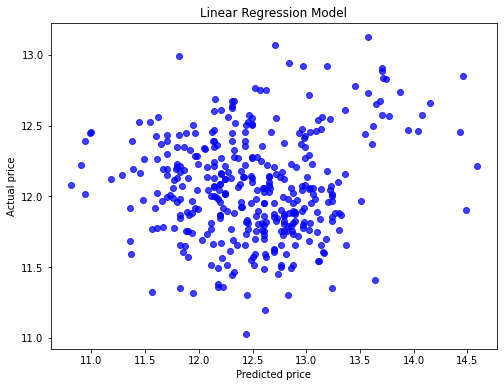

In [177]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_ln, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

## Lasso Regression

In [192]:
from sklearn.linear_model import Lasso, LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

0.0018338486306559711


In [193]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

lasso.fit(X_train, y_train)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.76672212 0.81307036 0.8068867  0.78072559 0.72665794 0.78667672
 0.78834031 0.71135747 0.82065922 0.81797678]
0.7819073211483303


In [194]:
#predicting on the test set

predictions_lasso = lasso.predict(X_test)

R2_score_lasso = metrics.r2_score(y_test, predictions_lasso)
R2_score_lasso

0.744873311651882

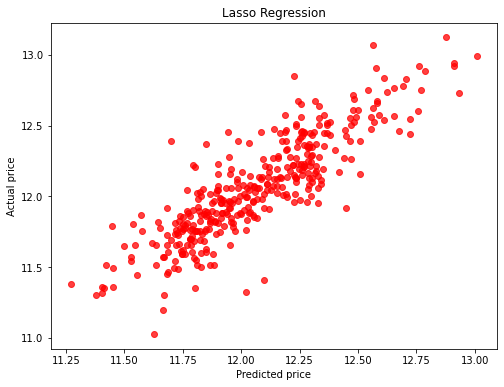

In [195]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_lasso, actual_values, alpha= 0.75, color = 'r')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Lasso Regression')
plt.show()

## Ridge Regression

In [196]:
from sklearn.linear_model import Ridge, RidgeCV

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

68.26071834272389


In [197]:
#predicting on the test set

predictions_ridge = ridge.predict(X_test)

R2_score_ridge = metrics.r2_score(y_test, predictions_ridge)
R2_score_ridge

-10.016850097057594

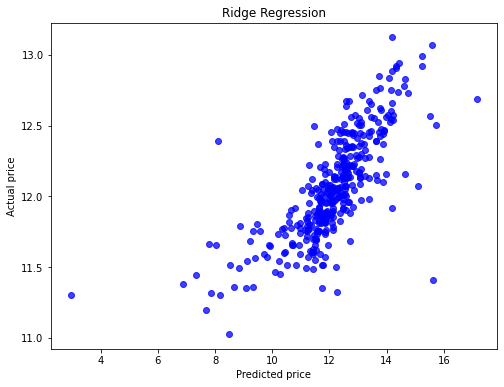

In [198]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_ridge, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Ridge Regression')
plt.show()

## ElasticNet Regression

In [199]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=0)
optimal_enet.fit(X_train, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

0.003802558098939286
0.46375000000000005


In [200]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train, y_train, cv=10)

enet.fit(X_train, y_train)

print(enet_scores)
print(np.mean(enet_scores))

[0.76695428 0.81336154 0.80680584 0.78039752 0.72663325 0.78597912
 0.78841923 0.71167714 0.82039296 0.8182978 ]
0.7818918691142555


In [201]:
#predicting on the test set

predictions_enet = enet.predict(X_test)

R2_score_enet = metrics.r2_score(y_test, predictions_enet)
R2_score_enet

0.7448811888115927

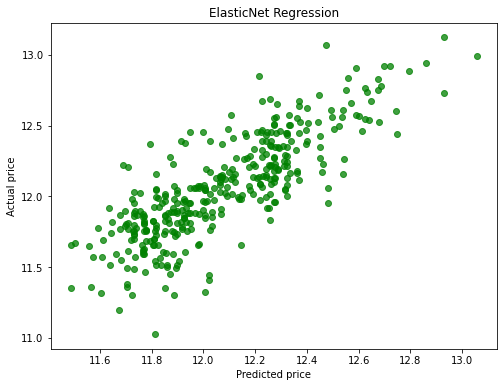

In [189]:
actual_values = y_test

plt.figure(figsize=(8,6))

plt.scatter(predictions_enet, actual_values, alpha= 0.75, color = 'g')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('ElasticNet Regression')
plt.show()

## Choosing the right model

In [190]:
R2 = pd.DataFrame({'Linear Regression': [R2_score_ln], 'Ridge Regression': [R2_score_ridge], 'Lasso Regression': [R2_score_lasso], 
                  'ElasticNet Regression': [R2_score_enet]})

In [191]:
R2.T.sort_values(0, ascending = False)

,0
ElasticNet Regression,0.668108
Lasso Regression,0.667635
Linear Regression,-4.046329
Ridge Regression,-10.016850
